#  Step - 1 : Import Libraries

In [3]:
import numpy as np
import pandas as pd

# Step - 2 : Data Collection

In [4]:
dataset = pd.read_csv('updated_infant_dataset.csv')
dataset.head()

,Infant_ID,Region,Age_Months,Height_cm,Weight_kg,Speech_Score,Milestone_Score,Period,Affected_By_COVID
0,INFPRE0001,South India,6,66.1,7.51,75.5,98.6,Pre-COVID,No
1,INFPRE0002,South India,3,58.0,5.33,84.2,61.9,Pre-COVID,No
2,INFPRE0003,South India,12,73.5,10.26,97.9,93.8,Pre-COVID,No
3,INFPRE0004,South India,10,73.4,8.67,91.3,86.4,Pre-COVID,No
4,INFPRE0005,South India,7,65.8,7.95,95.5,59.3,Pre-COVID,No


# Step 3: Shuffle and Reset Index

In [5]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(dataset.head())

    Infant_ID       Region  Age_Months  Height_cm  Weight_kg  Speech_Score  \
0  INFPRE1936  South India          11       76.0       9.93          78.5   
1  INFDUR2495  South India           9       70.2       8.60          73.5   
2  INFPRE1721  South India           6       64.6       7.39         100.0   
3  INFPOS1121  South India           0       50.5       3.57          62.3   
4  INFPRE0361  South India           5       61.5       6.37          98.1   

   Milestone_Score        Period Affected_By_COVID  
0            100.0     Pre-COVID                No  
1             58.6  During-COVID                No  
2             61.4     Pre-COVID                No  
3             72.5    Post-COVID                No  
4             70.1     Pre-COVID                No  


#  Step 4: Drop Irrelevant Columns

In [6]:
columns = ['Infant_ID', 'Region', 'Period']
dataset.drop(columns, axis=1, inplace=True)
dataset.head()

,Age_Months,Height_cm,Weight_kg,Speech_Score,Milestone_Score,Affected_By_COVID
0,11,76.0,9.93,78.5,100.0,No
1,9,70.2,8.60,73.5,58.6,No
2,6,64.6,7.39,100.0,61.4,No
3,0,50.5,3.57,62.3,72.5,No
4,5,61.5,6.37,98.1,70.1,No


# Step 5: Check for Missing Values

In [7]:
dataset.isna().sum()

,0
Age_Months,0
Height_cm,0
Weight_kg,0
Speech_Score,0
Milestone_Score,0
Affected_By_COVID,0


In [8]:
import warnings
warnings.filterwarnings("ignore")

#  Step 6: Separate Features and Target

In [9]:
x = dataset.iloc[:, :-1].values
x

array([[ 11.  ,  76.  ,   9.93,  78.5 , 100.  ],
       [  9.  ,  70.2 ,   8.6 ,  73.5 ,  58.6 ],
       [  6.  ,  64.6 ,   7.39, 100.  ,  61.4 ],
       ...,
       [ 12.  ,  76.9 ,   9.64,  77.7 ,  99.8 ],
       [  4.  ,  59.8 ,   5.2 ,  86.6 ,  88.9 ],
       [  5.  ,  62.  ,   5.83,  72.6 ,  82.6 ]])

In [10]:
y = dataset.iloc[:, -1].values
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Step 7: Encode or Fill Missing Values

In [12]:
#encoding missing values

dataset.fillna({
    'Age_Months': dataset['Age_Months'].mean(),
    'Height_cm': dataset['Height_cm'].mean(),
    'Weight_kg': dataset['Weight_kg'].mean(),
    'Speech_Score': dataset['Speech_Score'].mean(),
    'Affected_By_COVID': dataset['Affected_By_COVID'].mode()[0] }, inplace=True)

# Step 8: Encode Categorical Target Labels

In [13]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
x

array([[ 1.326427  ,  1.17274842,  1.32079856, -0.00682256,  1.72977272],
       [ 0.79109172,  0.56312669,  0.72362841, -0.44055148, -1.99371622],
       [-0.01191121, -0.0254736 ,  0.18033828,  1.8582118 , -1.74188605],
       ...,
       [ 1.59409465,  1.26734489,  1.19058853, -0.07621918,  1.71178485],
       [-0.5472465 , -0.52998814, -0.80297197,  0.69581829,  0.73144597],
       [-0.27957885, -0.29875231, -0.5201019 , -0.51862268,  0.16482809]])

# Step 9: Split Dataset into Training and Testing Sets

In [15]:
#training the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42, stratify=y)
x_train

array([[ 1.05875936,  0.81538395,  0.99302848,  0.99942854,  1.1541609 ],
       [ 1.59409465,  1.0571305 ,  1.86408869,  0.14931986,  0.48860974],
       [ 1.326427  ,  1.39347353,  1.82367868,  0.66111998,  1.17214877],
       ...,
       [-0.81491414, -1.00297052, -0.915222  , -0.60536847, -0.88746226],
       [ 0.25575643,  0.3003587 , -0.00824177,  1.63267276,  0.20979777],
       [-1.35024942, -1.3182921 , -1.3372821 , -0.90030413, -0.63563209]])

# Step 10: Install and Import XGBoost and Evaluate

In [16]:
!pip install xgboost

In [17]:
from xgboost import XGBClassifier


In [18]:
# Initialize XGBoost 2.0 model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    # XGBoost 2.0 specific parameters
    tree_method='hist',  # or 'gpu_hist' for GPU acceleration
    enable_categorical=False,  # set to True if you have categorical features
    verbosity=1
)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
y_pred_xgb = xgb.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.9941666666666666

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

cs_report_xgb = classification_report(y_test, y_pred_xgb)
print(cs_report_xgb)

[[2250    9]
 [   5  136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2259
           1       0.94      0.96      0.95       141

    accuracy                           0.99      2400
   macro avg       0.97      0.98      0.97      2400
weighted avg       0.99      0.99      0.99      2400



#  Step 10: Install and Import HistGradientBoostingClassifier and MLP Classifier , Evaluate

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

print("Training HistGradientBoosting (Scikit-learn 1.4)...")
start_time = time.time()

hgb = HistGradientBoostingClassifier(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

hgb.fit(x_train, y_train)
y_pred_hgb = hgb.predict(x_test)

print(f"Training time: {time.time() - start_time:.2f} seconds")
accuracy_hgb = accuracy_score(y_test, y_pred_hgb)
print(f"HistGradientBoosting Accuracy: {accuracy_hgb:.4f} ({accuracy_hgb * 100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hgb))

Training HistGradientBoosting (Scikit-learn 1.4)...
Training time: 1.71 seconds
HistGradientBoosting Accuracy: 0.9954 (99.54%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2259
           1       0.95      0.98      0.96       141

    accuracy                           1.00      2400
   macro avg       0.97      0.99      0.98      2400
weighted avg       1.00      1.00      1.00      2400



In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

print("Training MLP Classifier (Modern Deep Learning)...")
start_time = time.time()

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    random_state=42
)

mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

print(f"Training time: {time.time() - start_time:.2f} seconds")
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.4f} ({accuracy_mlp * 100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

Training MLP Classifier (Modern Deep Learning)...
Training time: 5.33 seconds
MLP Accuracy: 0.9892 (98.92%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2259
           1       0.86      0.97      0.91       141

    accuracy                           0.99      2400
   macro avg       0.93      0.98      0.95      2400
weighted avg       0.99      0.99      0.99      2400



# Step - 11 : Visualization for Feature Importance

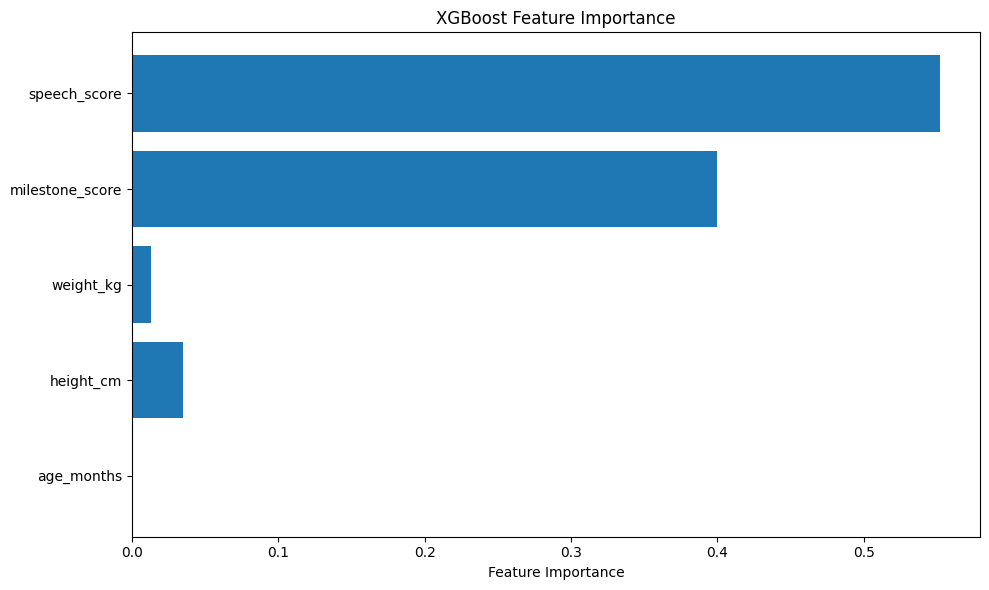

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for XGBoost
feature_importance = xgb.feature_importances_
feature_names = ['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Step - 12 : Visualization Future Prediction of Infants (after 5 years and 10 years)

In [25]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.9/551.9 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [26]:
from tabpfn import TabPFNClassifier
model = TabPFNClassifier(ignore_pretraining_limits = True)
model.fit(x_train, y_train)

y_pred_tab = model.predict(x_test)

print(f"Training time: {time.time() - start_time:.2f} seconds")
accuracy_tab = accuracy_score(y_test, y_pred_tab)
print(f"MLP Accuracy: {accuracy_tab:.4f} ({accuracy_tab * 100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tab))

RuntimeError: Authentication error downloading from 'Prior-Labs/tabpfn_2_5'.
This model is gated and requires you to accept its terms.

Please follow these steps:
1. Visit https://huggingface.co/Prior-Labs/tabpfn_2_5 in your browser and accept the terms of use.
2. Log in to your Hugging Face account via the command line by running:
   hf auth login
(Alternatively, you can set the HF_TOKEN environment variable with a read token).

For detailed instructions, see https://docs.priorlabs.ai/how-to-access-gated-models

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

future_years = [5, 10]   # predict 5 and 10 years ahead
future_months = [x * 12 for x in future_years]  # convert to months

predictions = {}

for Affected_By_COVID in dataset['Affected_By_COVID'].unique():

    subset = dataset[dataset['Affected_By_COVID'] == Affected_By_COVID]

    # Features: age_months
    X = subset[['Age_Months']]

    # Targets: each numeric development metric
    targets = ['Height_cm', 'Weight_kg', 'Milestone_Score', 'Speech_Score']

    preds = {}

    for target in targets:
        y = subset[target]

        # Train HistGradientBoostingRegressor
        model = LinearRegression()
        model.fit(X, y)

        # Predict future values
        future_preds = {}
        for f in future_months:
            next_age = subset['Age_Months'].max() + f
            pred_value = model.predict(np.array([[next_age]])).item()
            future_preds[f] = pred_value

        preds[target] = future_preds

    predictions[Affected_By_COVID] = preds

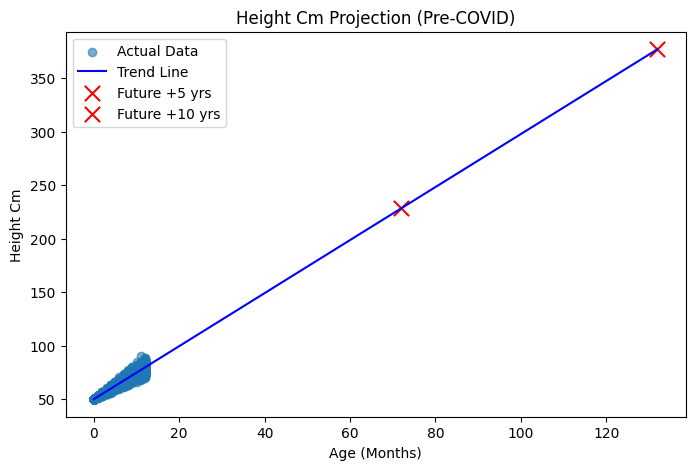

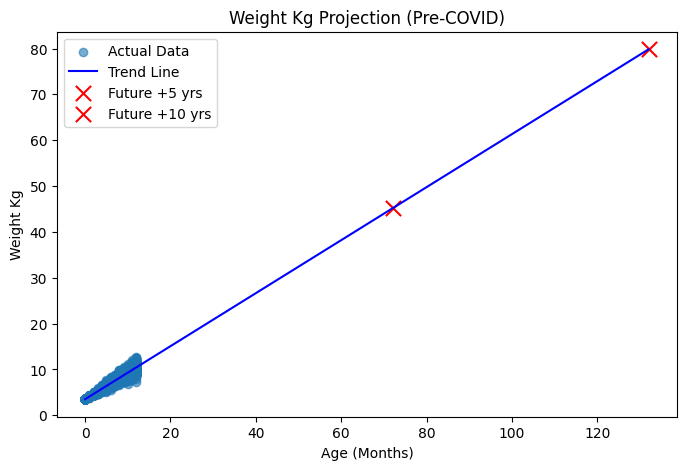

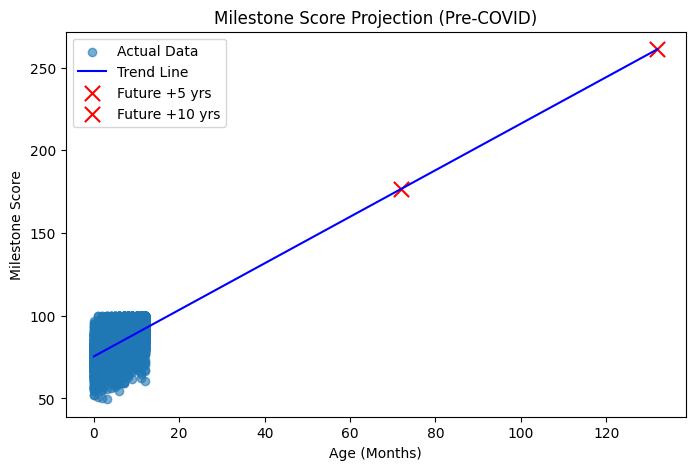

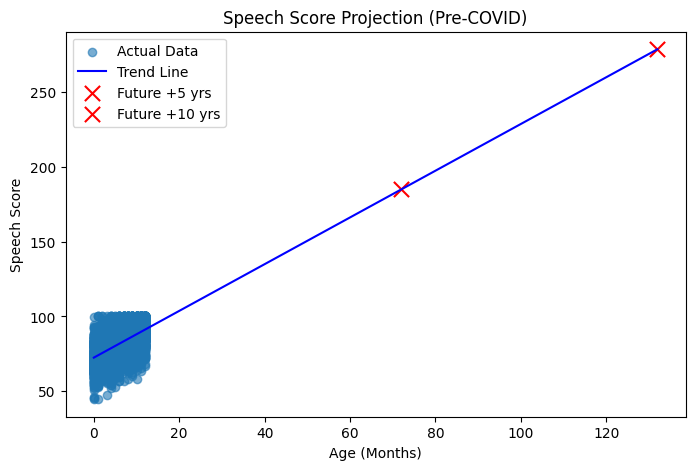

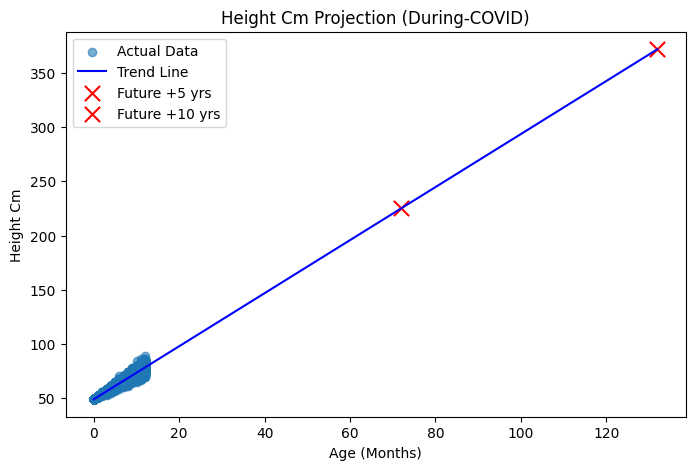

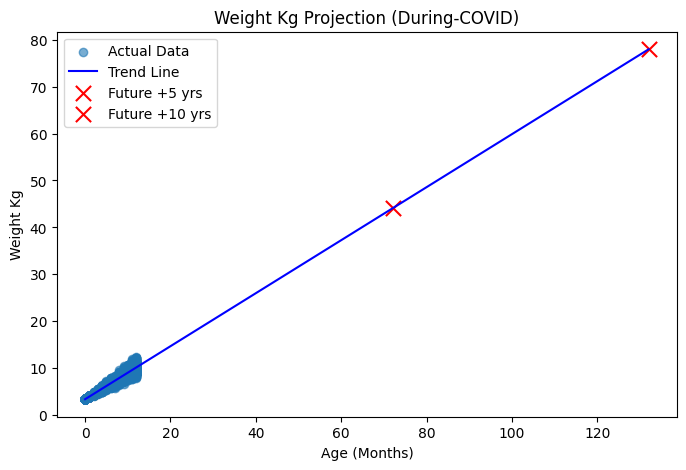

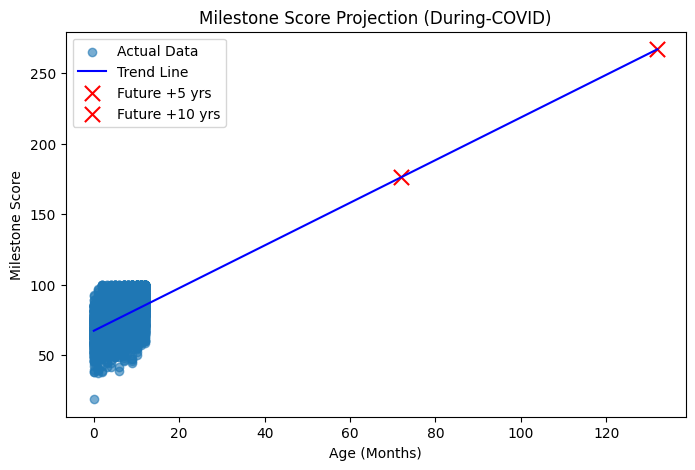

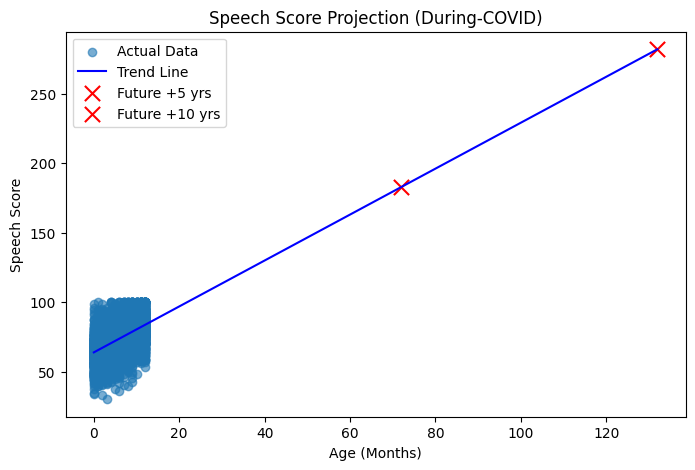

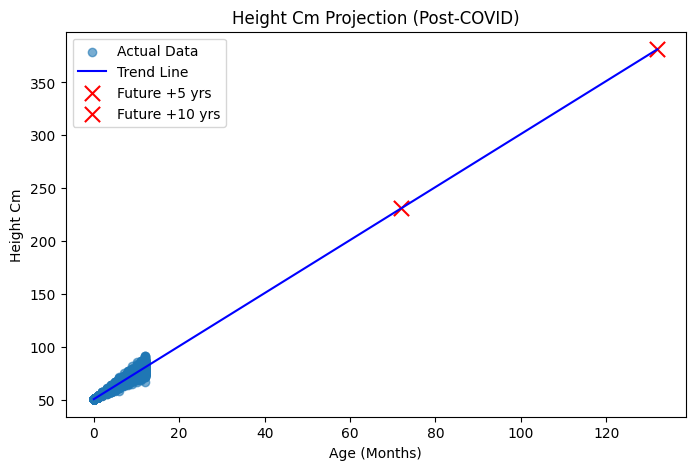

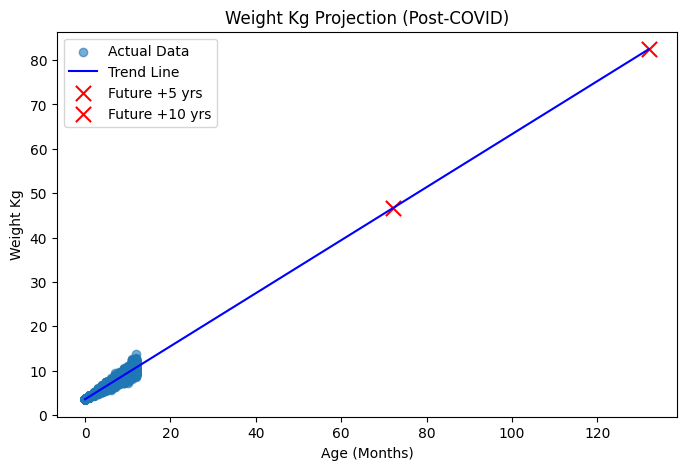

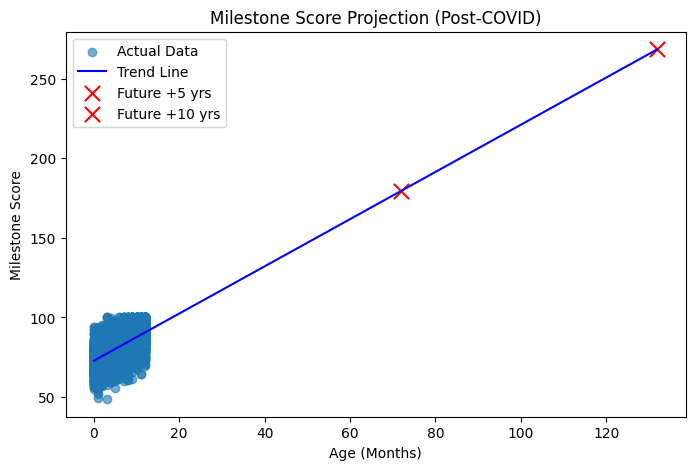

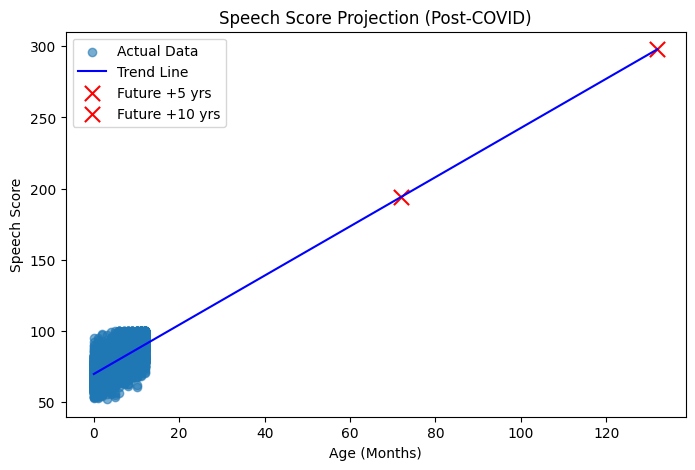

{'During-COVID': {'Height_cm': {60: 225.15075350354385,
                                120: 371.95532270897456},
                  'Milestone_Score': {60: 176.29326614573998,
                                      120: 266.99622803479315},
                  'Speech_Score': {60: 182.92207739301324,
                                   120: 282.1573864241147},
                  'Weight_kg': {60: 44.066228836784305,
                                120: 77.96842761944012}},
 'Post-COVID': {'Height_cm': {60: 230.99758762370385, 120: 381.3549754925194},
                'Milestone_Score': {60: 179.50781448001453,
                                    120: 268.38500839873416},
                'Speech_Score': {60: 194.13632308529526,
                                 120: 297.9641872467718},
                'Weight_kg': {60: 46.5842691770713, 120: 82.44423652969735}},
 'Pre-COVID': {'Height_cm': {60: 228.36903478610628, 120: 376.9491732892993},
               'Milestone_Score': {60: 176.704210359340

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ===============================
# 1️⃣ Load dataset
# ===============================
df = pd.read_csv("updated_infant_dataset.csv")

future_years = [5, 10]   # 5 and 10 years
future_months = [x * 12 for x in future_years]
targets = ['Height_cm', 'Weight_kg', 'Milestone_Score', 'Speech_Score']

predictions = {}

# ===============================
# 2️⃣ Predict future values from dataset
# ===============================
for period in df['Period'].unique():
    subset = df[df['Period'] == period]
    X = subset[['Age_Months']]

    preds = {}
    for target in targets:
        y = subset[target]

        model = LinearRegression()
        model.fit(X, y)

        future_preds = {}
        for f in future_months:
            future_age = subset['Age_Months'].max() + f
            pred_value = model.predict(np.array([[future_age]]))[0]
            future_preds[f] = float(pred_value)  # no capping, keep dataset trend

        preds[target] = future_preds
    predictions[period] = preds

# ===============================
# 3️⃣ Plot projections
# ===============================
def plot_future(period, target):
    subset = df[df['Period'] == period]
    plt.figure(figsize=(8,5))

    # Actual data
    plt.scatter(subset['Age_Months'], subset[target], alpha=0.6, label="Actual Data")

    # Trend line
    model = LinearRegression()
    model.fit(subset[['Age_Months']], subset[target])
    ages_range = np.linspace(subset['Age_Months'].min(),
                             subset['Age_Months'].max() + max(future_months), 300).reshape(-1,1)
    plt.plot(ages_range, model.predict(ages_range), color="blue", label="Trend Line")

    # Future predictions
    for f, val in predictions[period][target].items():
        future_age = subset['Age_Months'].max() + f
        plt.scatter(future_age, val, color="red", marker="x", s=120,
                    label=f"Future +{f//12} yrs")

    plt.title(f"{target.replace('_',' ').title()} Projection ({period})")
    plt.xlabel("Age (Months)")
    plt.ylabel(target.replace('_',' ').title())
    plt.legend()
    plt.show()

# Plot all targets
for period in df['Period'].unique():
    for target in targets:
        plot_future(period, target)

# ===============================
# 4️⃣ Display numerical future predictions
# ===============================
import pprint
pprint.pprint(predictions)


In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("updated_infant_dataset.csv")

future_years = [5, 10]   # 5 and 10 years
future_months = [x * 12 for x in future_years]

predictions = {}

# IMPORTANT: loop through Period (NOT Affected_By_COVID)
for period in df['Period'].unique():

    subset = df[df['Period'] == period]

    X = subset[['Age_Months']]
    targets = ['Height_cm', 'Weight_kg', 'Milestone_Score', 'Speech_Score']

    preds = {}

    for target in targets:
        y = subset[target]

        model = LinearRegression()
        model.fit(X, y)

        future_preds = {}

        for f in future_months:
            future_age = subset['Age_Months'].max() + f
            pred_value = model.predict(np.array([[future_age]]))[0]
            future_preds[f] = float(pred_value)

        preds[target] = future_preds

    predictions[period] = preds


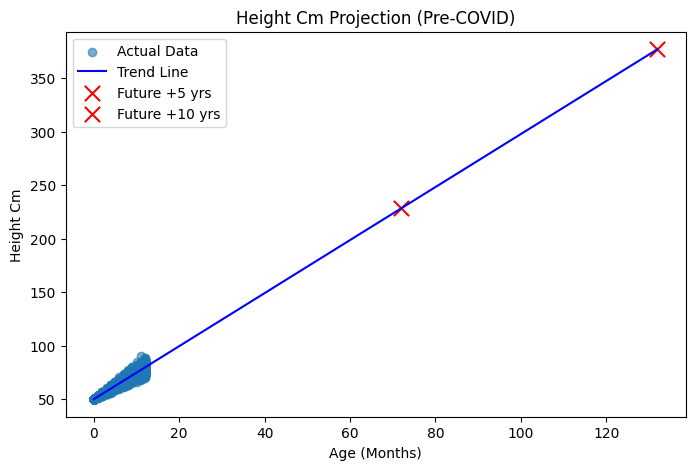

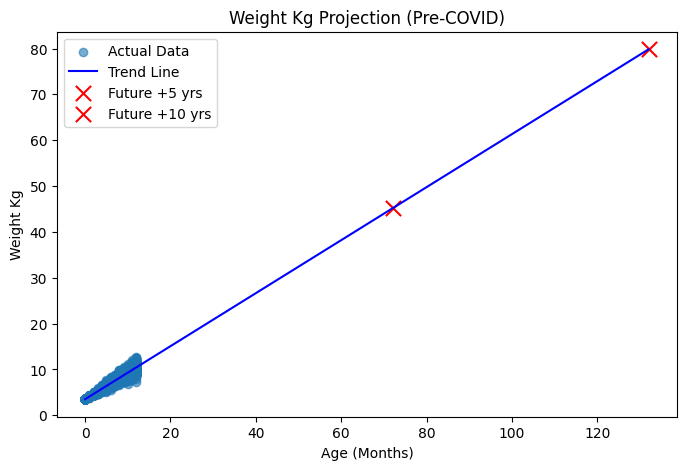

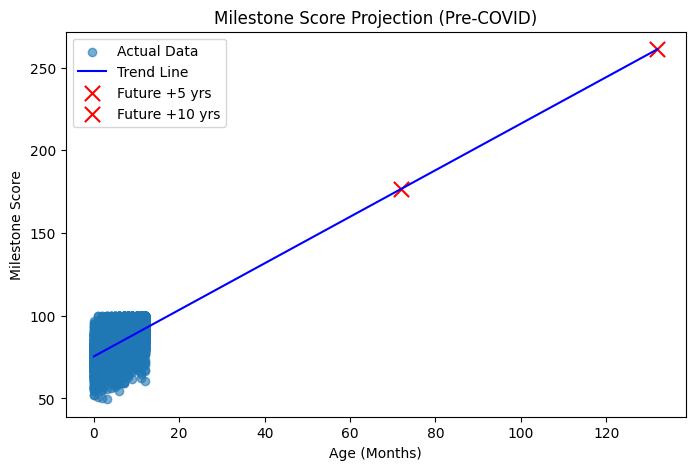

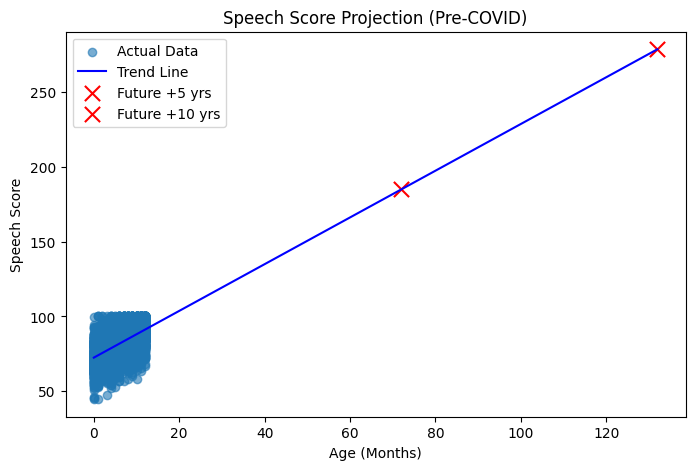

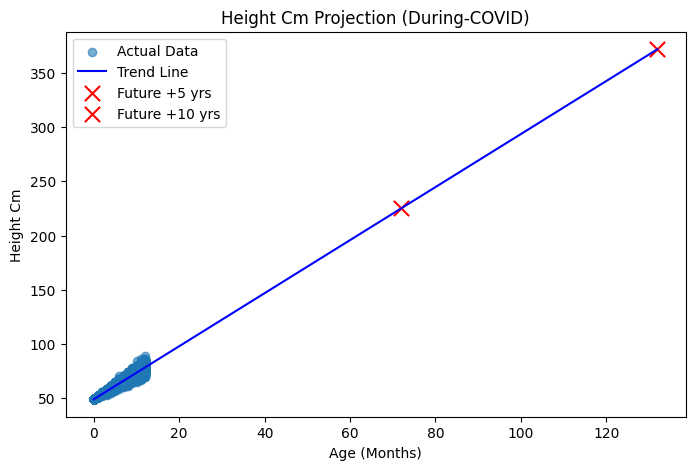

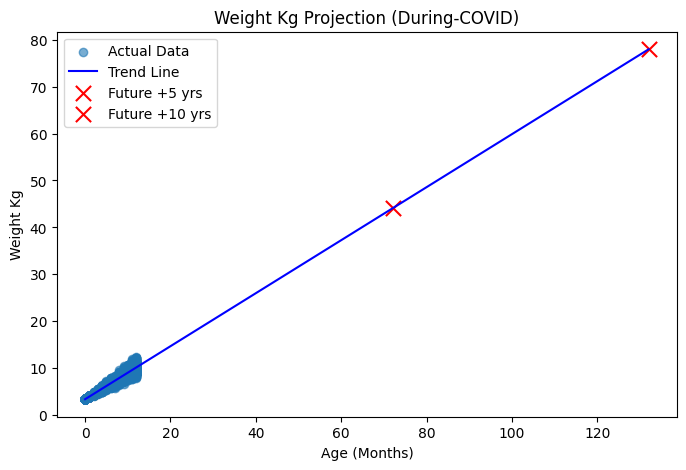

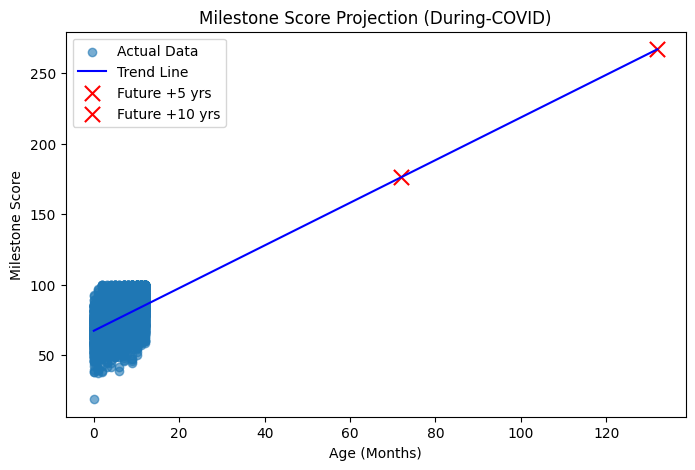

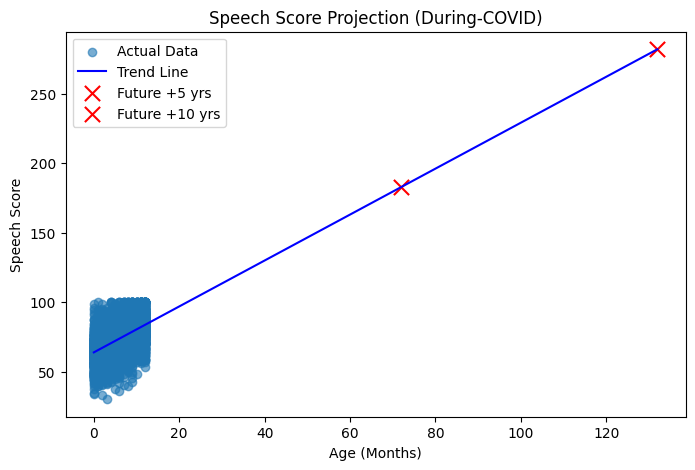

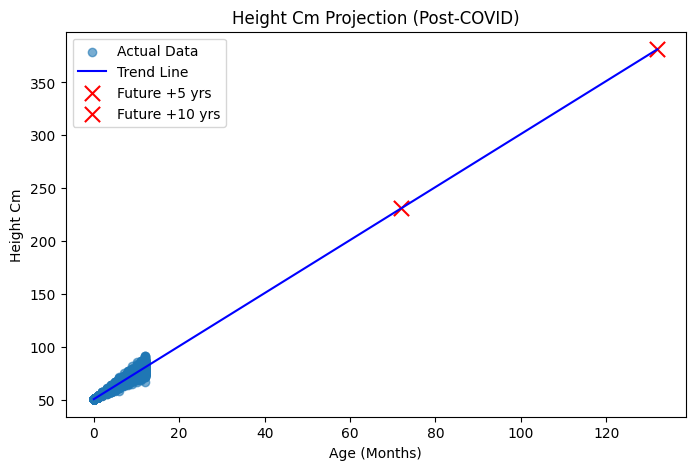

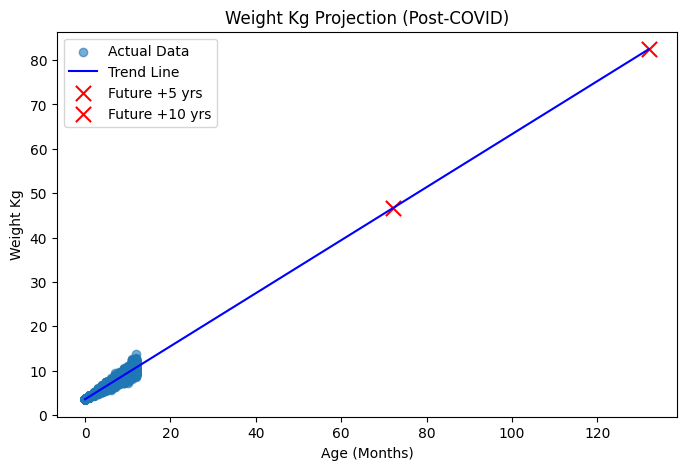

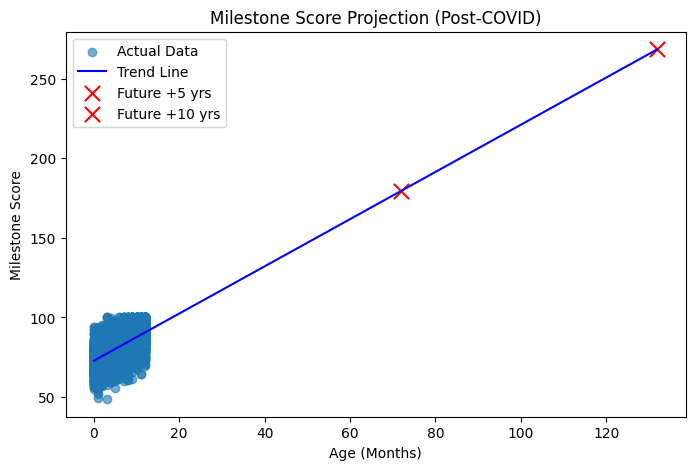

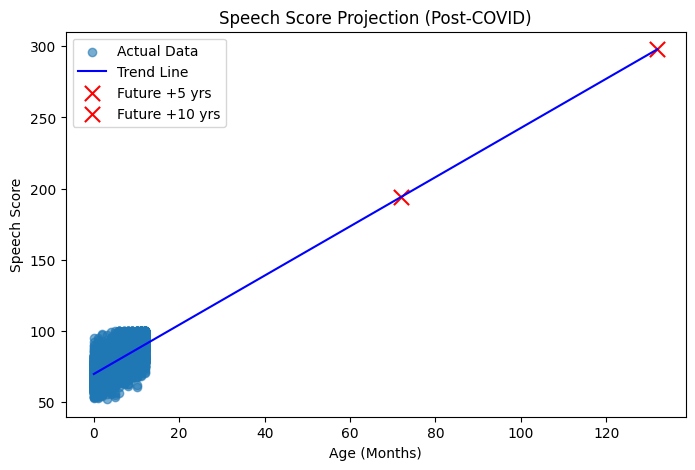

{'During-COVID': {'Height_cm': {60: 225.15075350354385,
                                120: 371.95532270897456},
                  'Milestone_Score': {60: 176.29326614573998,
                                      120: 266.99622803479315},
                  'Speech_Score': {60: 182.92207739301324,
                                   120: 282.1573864241147},
                  'Weight_kg': {60: 44.066228836784305,
                                120: 77.96842761944012}},
 'Post-COVID': {'Height_cm': {60: 230.99758762370385, 120: 381.3549754925194},
                'Milestone_Score': {60: 179.50781448001453,
                                    120: 268.38500839873416},
                'Speech_Score': {60: 194.13632308529526,
                                 120: 297.9641872467718},
                'Weight_kg': {60: 46.5842691770713, 120: 82.44423652969735}},
 'Pre-COVID': {'Height_cm': {60: 228.36903478610628, 120: 376.9491732892993},
               'Milestone_Score': {60: 176.704210359340

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# ======================================
# Load dataset once
# ======================================
df = pd.read_csv("updated_infant_dataset.csv")


# ======================================
# Step 3: Visualize Projections
# ======================================

def plot_future(period, predictions, target):

    # Filter dataset based on COVID Period
    subset = df[df['Period'] == period]

    plt.figure(figsize=(8,5))

    # Actual scatter plot
    plt.scatter(subset['Age_Months'], subset[target],
                alpha=0.6, label="Actual Data")

    # Fit model for trend line
    model = LinearRegression()
    model.fit(subset[['Age_Months']], subset[target])

    # Smooth curve for trend line
    ages_range = np.linspace(
        subset['Age_Months'].min(),
        subset['Age_Months'].max() + max(future_months),
        300
    ).reshape(-1, 1)

    plt.plot(ages_range, model.predict(ages_range),
             color="blue", label="Trend Line")

    # Future predictions
    for f, val in predictions[period][target].items():
        future_age = subset['Age_Months'].max() + f
        plt.scatter(future_age, val, color="red",
                    marker="x", s=120,
                    label=f"Future +{f//12} yrs")

    plt.title(f"{target.replace('_',' ').title()} Projection ({period})")
    plt.xlabel("Age (Months)")
    plt.ylabel(target.replace('_',' ').title())
    plt.legend()
    plt.show()



# ======================================
# Step 3(b): Visualize All Targets
# ======================================
for period in df['Period'].unique():
    for target in ['Height_cm', 'Weight_kg',
                   'Milestone_Score', 'Speech_Score']:
        plot_future(period, predictions, target)



# ======================================
# Step 4: Display numerical results
# ======================================
import pprint
pprint.pprint(predictions)


# Step - 13 : Save Model

In [31]:
import pickle
from flask import Flask, request, render_template

In [32]:
# Save model & encoder
with open("Histgb.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [33]:
!pip install flask-ngrok

In [34]:
!pip install pyngrok


In [35]:
import os
os.makedirs("templates", exist_ok=True)


# Step - 14: Flask APP

In [36]:
import os
import signal
import subprocess

# Kill all python.exe processes EXCEPT the current Jupyter kernel
try:
    output = subprocess.check_output('tasklist', shell=True).decode()

    for line in output.splitlines():
        if "python.exe" in line and "jupyter" not in line.lower():
            pid = int(line.split()[1])
            try:
                os.kill(pid, signal.SIGTERM)
                print("Killed python process:", pid)
            except:
                pass

except Exception as e:
    print("Error:", e)

# Kill ngrok.exe
try:
    subprocess.call('taskkill /f /im ngrok.exe', shell=True)
    print("Killed ngrok")
except:
    pass


Error: Command 'tasklist' returned non-zero exit status 127.
Killed ngrok


In [ ]:
# app.py
from flask import Flask, request
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import threading
import time
import atexit
from pyngrok import ngrok

app = Flask(__name__)

# Global Variables
model = None
label_encoder = None
ngrok_tunnel = None


# ============================================
# Load & Train Model
# ============================================
def load_model_and_encoder(dataset_df):
    global model, label_encoder

    try:
        # Correct feature names
        X = dataset_df[['Milestone_Score', 'Speech_Score']]
        y = dataset_df['Affected_By_COVID']  # Yes/No

        # Label Encode
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.25, random_state=42
        )

        print("Training HistGradientBoostingClassifier...")

        model = HistGradientBoostingClassifier(
            learning_rate=0.1,
            max_depth=3,
            random_state=42
        )
        model.fit(X_train, y_train)

        acc = model.score(X_test, y_test)
        print(f"Model trained successfully! Accuracy = {acc:.4f}")
        print(f"Classes: {label_encoder.classes_}")

    except Exception as e:
        print("Model training error:", e)
        raise e


# ============================================
# Ngrok Setup
# ============================================
def setup_ngrok():
    global ngrok_tunnel

    try:
        ngrok.kill()
        NGROK_TOKEN = "35RYQxZq2Dw33qXPG95a6aqCudC_5vbAUP9gx52N5r3EMcDPb"
        ngrok.set_auth_token(NGROK_TOKEN)

        ngrok_tunnel = ngrok.connect(5000)
        print("APP LIVE AT:", ngrok_tunnel.public_url)

    except Exception as e:
        print("NGROK ERROR:", e)


@atexit.register
def cleanup():
    if ngrok_tunnel:
        ngrok.disconnect(ngrok_tunnel.public_url)
    ngrok.kill()


# ============================================
# Home Page
# ============================================
@app.route('/')
def home():
    return '''
    <!DOCTYPE html>
    <html>
    <head>
        <title>COVID Impact Prediction</title>
        <style>
            body { font-family: Arial; background: #f5f5f5; padding: 40px; }
            .box { max-width: 500px; margin: auto; padding: 25px;
                   background: #fff; border-radius: 10px;
                   box-shadow: 0 2px 10px rgba(0,0,0,0.1); }
            h1 { text-align: center; }
            label { font-weight: bold; }
            input { width: 100%; padding: 10px; margin-top: 8px;
                    border: 1px solid #ccc; border-radius: 5px; }
            button { margin-top: 20px; width: 100%; padding: 12px;
                     background: blue; color: white; border: none;
                     border-radius: 5px; font-size: 16px; }
            button:hover { background: darkblue; }
        </style>
    </head>
    <body>
        <div class="box">
            <h1>COVID Impact Prediction</h1>
            <form method="post" action="/predict">
                <label>Milestone Score (0–100)</label>
                <input type="number" name="Milestone_Score" required>

                <label>Speech Score (0–100)</label>
                <input type="number" name="Speech_Score" required>

                <button type="submit">Predict</button>
            </form>
        </div>
    </body>
    </html>
    '''


# ============================================
# Prediction Page
# ============================================
@app.route('/predict', methods=['POST'])
def predict():

    try:

        if model is None:
            return "MODEL NOT LOADED. Try again later."

        #  FIXED — Correct form input names
        milestone = float(request.form['Milestone_Score'])
        speech = float(request.form['Speech_Score'])

        features = np.array([[milestone, speech]])

        pred_encoded = model.predict(features)
        pred_label = label_encoder.inverse_transform(pred_encoded)[0]

        probs = model.predict_proba(features)[0]
        confidence = float(np.max(probs))

        return f'''
        <html>
        <body style="font-family:Arial; background:#f5f5f5; padding:40px;">
            <div style="max-width:500px; margin:auto; background:white;
                        padding:25px; border-radius:10px;">
                <h2 style="text-align:center;">COVID Impact Result</h2>

                <h3 style="text-align:center; color:green;">
                    Prediction: {pred_label.upper()}
                </h3>

                <p style="text-align:center;">Confidence:
                {confidence*100:.2f}%</p>

                <h4>Class Probabilities:</h4>
                <ul>
                    <li>Not Affected:
                        {probs[label_encoder.transform(['No'])[0]]*100:.2f}%</li>
                    <li>Affected:
                        {probs[label_encoder.transform(['Yes'])[0]]*100:.2f}%</li>
                </ul>

                <a href="/" style="display:block; text-align:center;
                                   margin-top:20px;">← Back</a>
            </div>
        </body>
        </html>
        '''

    except Exception as e:
        return f"Prediction Error: {e}"


# ============================================
# Start App
# ============================================
def start_application(dataset_df):
    print("Training model...")
    ngrok.kill()
    load_model_and_encoder(dataset_df)

    threading.Thread(target=lambda: (time.sleep(3), setup_ngrok()),
                     daemon=True).start()

    app.run(host='0.0.0.0', port=5000, debug=False)


if __name__ == '__main__':
    try:
        dataset = pd.read_csv("updated_infant_dataset.csv")
        print("Dataset loaded.")
        start_application(dataset)
    except Exception as e:
        print("ERROR:", e)


Dataset loaded.
Training model...
Training HistGradientBoostingClassifier...
Model trained successfully! Accuracy = 0.9920
Classes: ['No' 'Yes']
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


APP LIVE AT: https://nondilatable-evanescently-jeri.ngrok-free.dev
